In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("E:\\download folder\\Zoo.csv")
df.shape

(101, 18)

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df["animal name"].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [7]:
duplicates= df["animal name"].value_counts()
duplicates[duplicates>1]

animal name
frog    2
Name: count, dtype: int64

In [8]:
frog= df[df["animal name"]=="frog"]
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [9]:
# Found one frog is venomous and the other one is not.
# So we can the change the name of the venomous frog as frog2

df["animal name"][(df["venomous"]== 1) & (df["animal name"]== "frog")]= "frog2"


C:\Users\Akshay\AppData\Local\Temp\ipykernel_2876\2359021044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["animal name"][(df["venomous"]== 1) & (df["animal name"]== "frog")]= "frog2"


In [10]:
df["hair"].value_counts()

hair
0    58
1    43
Name: count, dtype: int64

In [11]:
df["type"].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [12]:
# We can see that all the variables are encoded into 0 and 1 except legs. 
# So we will use encoding technique on legs as well.

from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

df["legs"]=LE.fit_transform(df["legs"])
df["legs"].value_counts()

legs
2    38
1    27
0    23
4    10
5     2
3     1
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

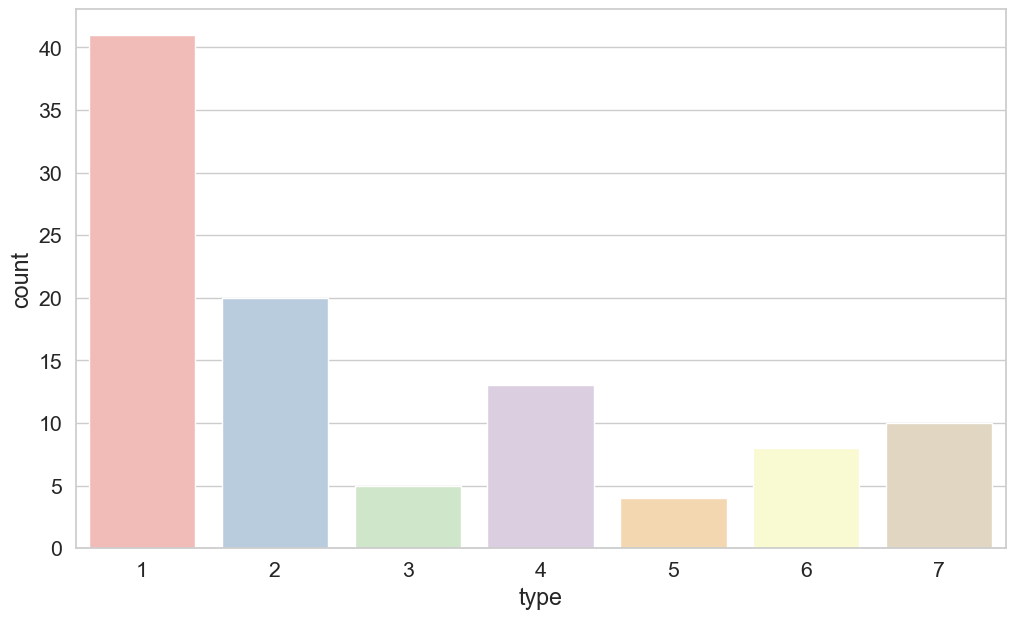

In [13]:
sns.set(style= "whitegrid", font_scale= 1.4)
plt.subplots(figsize=(12,7))
sns.countplot(x='type', data= df, palette= "Pastel1")

In [14]:
y= df["type"]

In [15]:
x= df.drop("animal name", axis= 1)

In [16]:
x= x.drop("type", axis= 1)

In [17]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1


In [18]:
# Data partition 

from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, stratify= y)


In [19]:
x_train= np.array(x_train)

In [20]:
x_test= np.array(x_test)

In [21]:
y_train= np.array(y_train)

In [22]:
y_test= np.array(y_test)

In [23]:
# Model fitting 

from sklearn.neighbors import KNeighborsClassifier

KNN= KNeighborsClassifier(n_neighbors= 2)
KNN.fit(x_train, y_train)
y_pred_train= KNN.predict(x_train)
y_pred_test= KNN.predict(x_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
ac2 = accuracy_score(y_test,y_pred_test)
print("Training Accuracy score: ", ac1.round(2))
print("Testing Accuracy score: ", ac2.round(2))

Training Accuracy score:  0.97
Testing Accuracy score:  0.84


In [24]:
# k = 2, with cross validation

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,201):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    x_train= np.array(x_train)
    x_test= np.array(x_test)
    KNN.fit(x_train,y_train)
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))


Cross validation Training score:  1.0
Cross validation Test score:  0.95


In [25]:
# Grid search for Algorithm Tuning

n_neighbors= np.array(range(1,40))
param_grid= dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [26]:
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid,cv=10)
grid.fit(x_train, y_train)
print(grid.best_params_)

E:\softwares\Newfolder\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


{'n_neighbors': 1}


E:\softwares\Newfolder\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
E:\softwares\Newfolder\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
E:\softwares\Newfolder\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
E:\softwares\Newfolder\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
E:\softwares\Newfolder\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
E:\softwares\Newfolder\Lib\site-pac

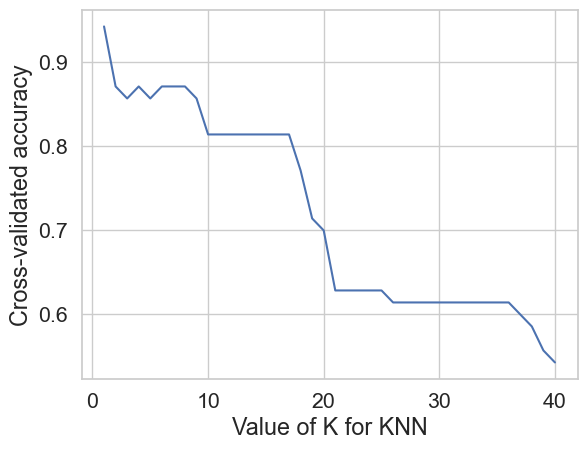

In [27]:
# Visualizing CV results

from sklearn.model_selection import cross_val_score
%matplotlib inline

k_range= range(1,41)
k_scores= []

for k in k_range:
    KNN= KNeighborsClassifier(n_neighbors= k)
    scores= cross_val_score(KNN, x_train, y_train, cv=10)
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-validated accuracy")
plt.show()

In [28]:
# Accuracy score can be misleading for imbalanced data. 
#So we will use confusion matrix and classification report metrics further

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix= confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[14  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  4]]


In [29]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           6       0.67      1.00      0.80         2
           7       1.00      0.80      0.89         5

    accuracy                           0.97        31
   macro avg       0.94      0.97      0.95        31
weighted avg       0.98      0.97      0.97        31



In [30]:
#!pip install imbalanced-learn

In [31]:
# Using Over Sampling for balancing the data
# We will use RandomOverSampler (ROS) for sampling the the data to balance our data

import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 30)

In [35]:
# Model fitting using ROS

x_resample, y_resample= ros.fit_resample(x,y)

y_df= pd.DataFrame(y_resample)

In [36]:
# Data is balanced

y_df.value_counts()

type
1       41
2       41
3       41
4       41
5       41
6       41
7       41
Name: count, dtype: int64

In [32]:
#pip install -U imbalanced-learn

In [33]:
#conda install -c glemaitre imbalanced-learn

In [38]:
#Data partition of resampled data

x_train, x_test, y_train, y_test= train_test_split(x_resample, y_resample, 
                                                   test_size= 0.25, 
                                                   random_state = 30, 
                                                   stratify= y_resample)

In [41]:
# Using GridSearch for Algorithm Tuning after resampling

n_neighbors= np.array(range(1,40))

param_grid= dict(n_neighbors= n_neighbors)

KNN= KNeighborsClassifier()

grid= GridSearchCV(estimator= KNN, param_grid=param_grid, cv=10)
grid.fit(x_train, y_train)
grid.best_params_


E:\softwares\Newfolder\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\softwares\Newfolder\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\softwares\Newfolder\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\softwares\Newfolder\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "E:\softwares\Newfolder\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKminClassMod

{'n_neighbors': 1}

In [45]:
# Model fitting Using KNN with k=1

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,201):
    x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample, test_size=0.30,random_state=i)
    x_train= np.array(x_train)
    x_test= np.array(x_test)
    KNN.fit(x_train,y_train)
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

Cross validation Training score:  1.0
Cross validation Test score:  1.0


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print (confusion_matrix)

[[15  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  0 13  0  0  0  0]
 [ 0  0  0 14  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 10]]


In [49]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        10

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



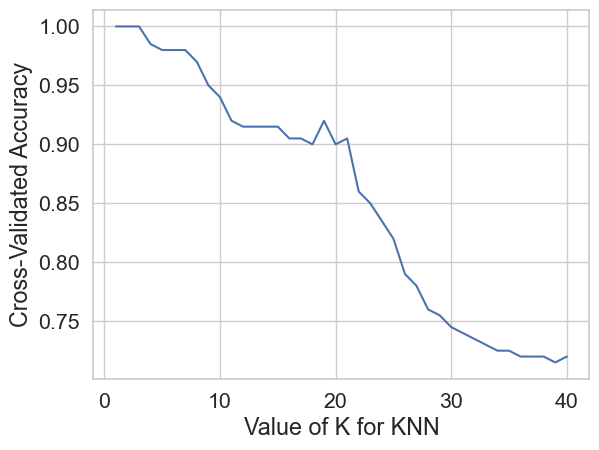

In [50]:
# Visualizing CV results

k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()